In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


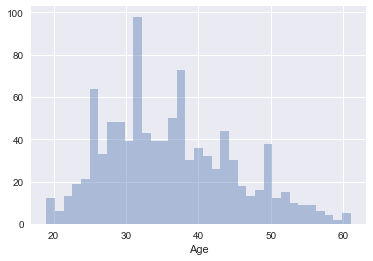

In [5]:
sns.distplot(ad_data['Age'], bins = 35, kde = False)

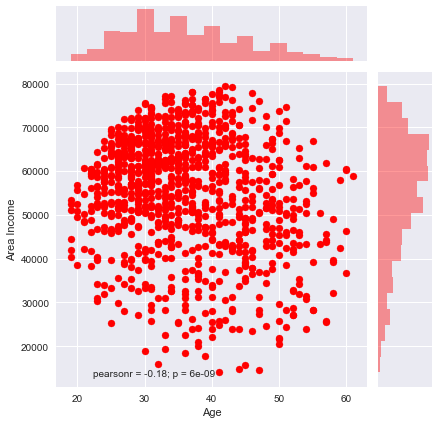

In [6]:
sns.jointplot(x = 'Age', y = 'Area Income', data = ad_data, color='red')

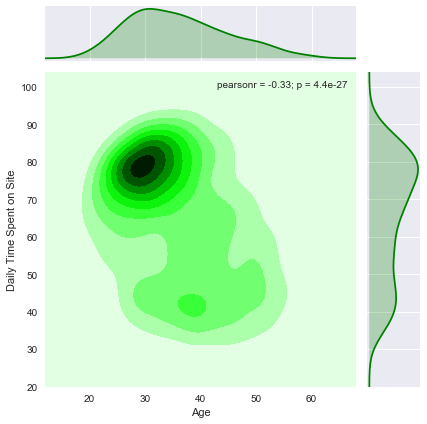

In [7]:
sns.jointplot(x='Age', y = 'Daily Time Spent on Site', data = ad_data, kind= 'kde', color='green')

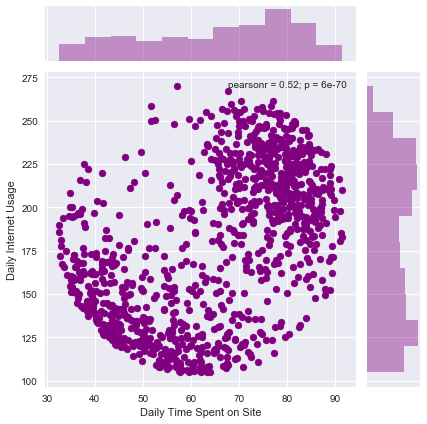

In [9]:
sns.jointplot(x='Daily Time Spent on Site', y = 'Daily Internet Usage', data = ad_data, color='purple')

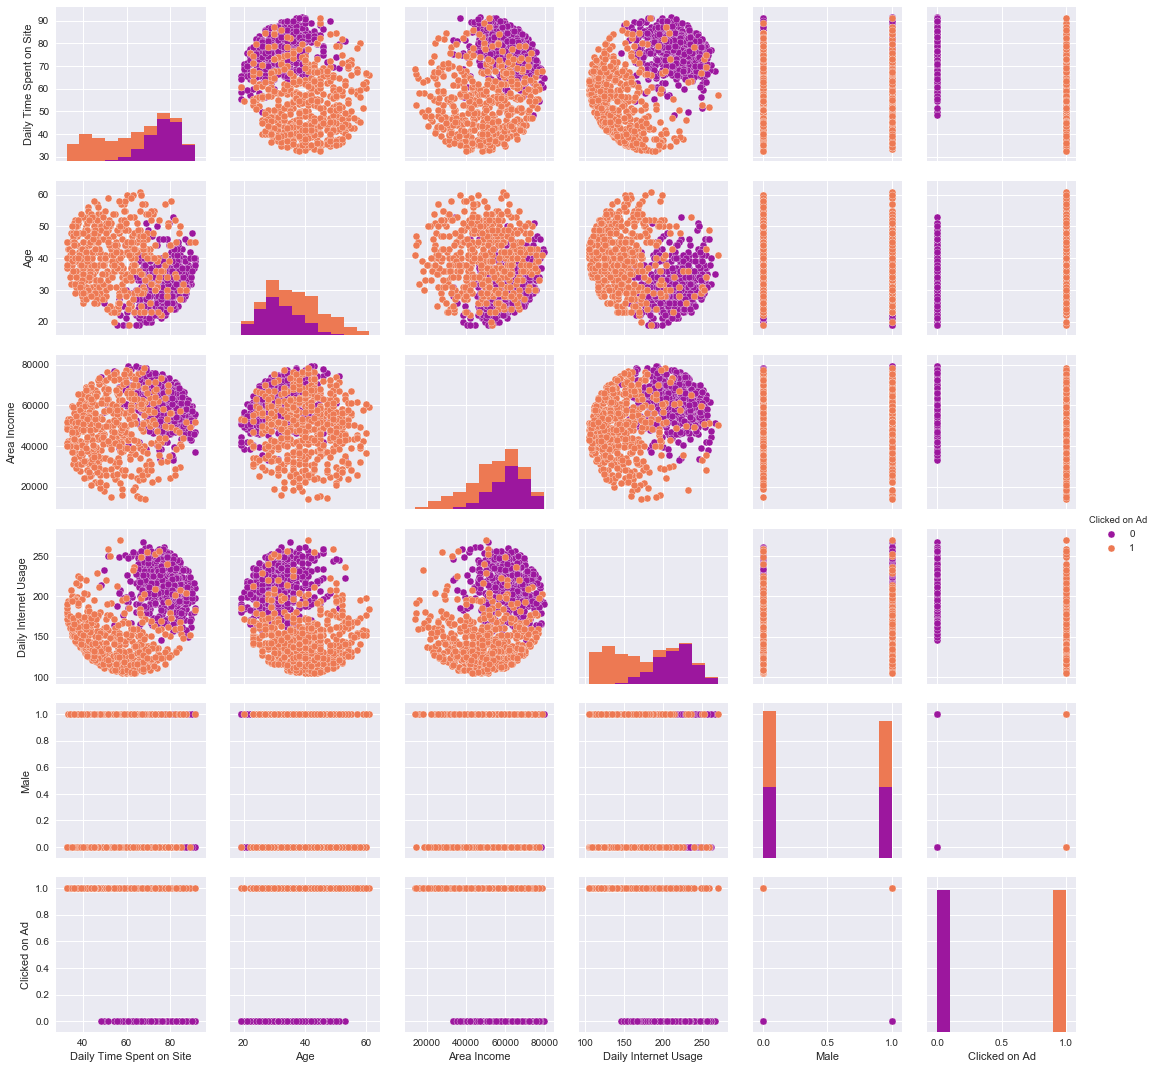

In [10]:
sns.pairplot(ad_data, hue = 'Clicked on Ad', palette='plasma')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = ad_data[['Daily Time Spent on Site', 'Age', u'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 101)

In [13]:
from sklearn.linear_model import LogisticRegression
logm = LogisticRegression()

In [14]:
logm.fit(X_train,y_train)
predictions = logm.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300



In [18]:
print(confusion_matrix(y_test, predictions))

[[149   8]
 [ 15 128]]
